In [2]:
# I mporting libraries.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.formula.api as smf

In [3]:
# Practice of opening the file from the Desktop.
salary_df = pd.read_csv('C:\\Users\\User\\Desktop\\Salary_dataset.csv')

# Display on the screen.
salary_df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# Data Science - Linear Regression
_____
### Linear Regression
- The term **regression** is used when you try to find the relationship between variables.

In Machine Learning and in statistical modeling, that relationship is used to predict the outcome of events.


- **Linear regression** uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.
In Machine Learning, predicting the future is very important.

_____
Let's first see an easy example about the relationship between the growth of electricity consumption with the decrease in the temperature rate:

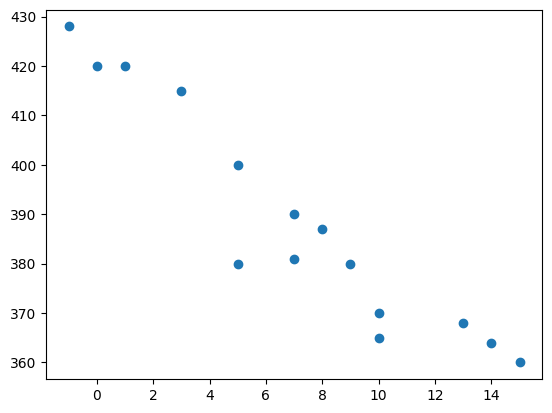

In [4]:
# Create the variables of electricity consumption (kWh) as the temperature rate (degrees) goes down.
temp = [15, 14, 13, 10, 10, 9, 7, 8, 7, 5, 5, 3, 1, 0, -1]
electricity = [360, 364, 368, 370, 365, 380, 381, 387, 390, 380, 400, 415, 420, 420, 428]

# Plot the scatter. 
plt.scatter(temp, electricity)
plt.show()

#### So, here we can see the relation between two variables, and they correlate explicitly. This is also example for negative correlation coefficient. 

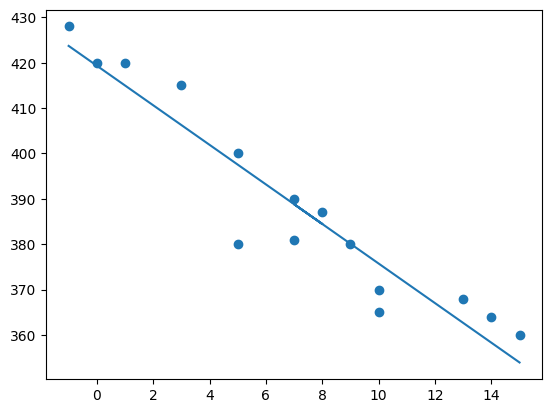

In [5]:
# Let's use linear regression to show this correlation more accurately. 

# Use the linregress() function of the stats library 
slope, intercept, r, p, std_err = stats.linregress(temp, electricity)

# Create a function that uses slope and intercept for placing y-value corresponding to x-value.
def myfunc(x):
    return slope * x + intercept

# Run each value of temp array through the function.
mymodel = list(map(myfunc, temp))

# Draw the original scatter
plt.scatter(temp, electricity)
# Draw the linear regrassion line
plt.plot(temp, mymodel)
plt.show()

#### Now let's use the example from our dataset.

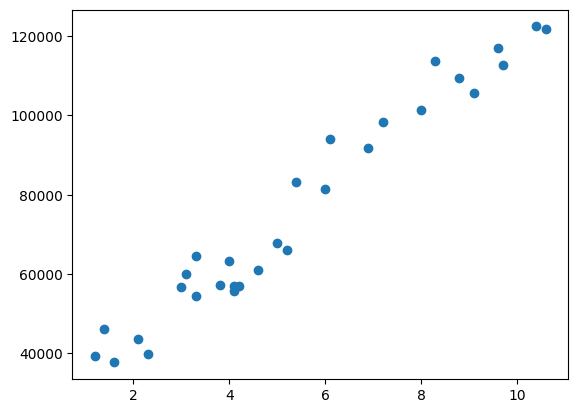

In [6]:
# Does the age of the patients correlate with the blood glucose level? And how?
years_work = salary_df['YearsExperience']
salary = salary_df['Salary']

# Plot the scatter.
plt.scatter(years_work, salary)
plt.show()

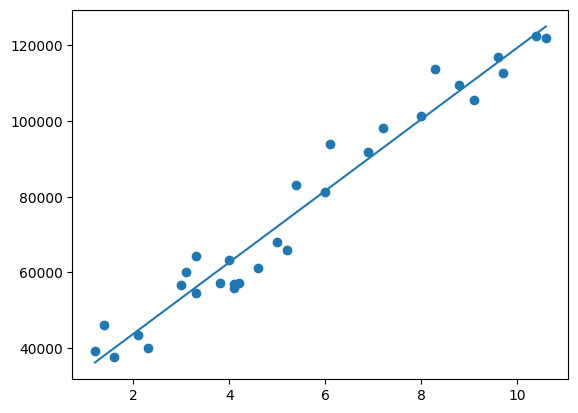

In [7]:
# Use linear regression to show the correlation.
slope, intercept, r, p, std_err = stats.linregress(years_work, salary)

def myfunc(x):
    return slope * x + intercept

mymodel_1 = list(map(myfunc, years_work))

# Draw the original scatter.
plt.scatter(years_work, salary)

# Draw the linear regression.
plt.plot(years_work, mymodel_1)
plt.show()

## Regression Table
______
The output from linear regression can be summarized in a regression table.

The content of the table includes:

- Information about the model
- Coefficients of the linear regression function
- Regression statistics
- Statistics of the coefficients from the linear regression function
- Other information that we will not cover in this module

In [8]:
# Create a model using the Ordinary Least Square method smf.ols()
model = smf.ols('Salary ~ YearsExperience', data = salary_df)

# Obtain the variable results by calling fit(). 
results = model.fit()

# Call summary() to get the table with the linear regression results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        19:52:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     

### Infromation part of Refression table:
_____
    - Dep. Variable: shows the dependent variable. Here it is Salary. 
    - Model: the OLS - Ordinary Least Square. This is a type of model that uses the Least Square method.

#### Least Square Method
Linear regression uses the least square method.

The concept is to draw a line through all the plotted data points. The line is positioned in a way that it minimizes the distance to all of the data points.

The distance is called "residuals" or "errors".

    - Date and Time: shows the date and time the output was calculated in Python.

### Coefficients
____
    - Coef: is short for coefficient. It is the output of the linear regression function. It shows how large or small the effect of the independent variaable to dependent. We can use this information as the formula. 

$Salary = 9449.9623 * YearsExperince + (2.485e+04)$

It means that: 
- if the YearsExperience increases by 1, the Salary will increase by 9449.9623
- if YearsExperience = 0, then the Salary = 2.485e+04.
- the Intercept represents the mean value of the response variable when all of the predictor variables in the model are equal to zero.

##### Define the Linear Regression Function in Python
______
Define the linear regression function in Python to perform predictions.

In [9]:
# Create a function for predicting the value of dependent variable using the independent one.
def predict_salary(YearsExperience):
    return(9449.9623 * YearsExperience + 2.485e+04)

# Putting some particular value that we need
print(round(predict_salary(8), 2))
print(round(predict_salary(10), 2))
print(round(predict_salary(15), 2))

100449.7
119349.62
166599.43


There are four components that explains the statistics of the coefficients:

    - std err stands for Standard Error
    - t is the "t-value" of the coefficients
    - P>|t| is called the "P-value"
    - [0.025  0.975] represents the confidence interval of the coefficients


### P-value 
____
**P-value** is the value which indicates the presence of relationship between variables. 

We test if the true value of the coefficient is equal to zero (no relationship). The statistical test for this is called Hypothesis testing.

- A low P-value (< 0.05) means that the coefficient is likely not to equal zero.
- A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable (here: if Average_Pulse affects Calorie_Burnage).
- A high P-value is also called an insignificant P-value.

In our particular example, we have the **p-value = 0.00**, which means that the possibility of the absence of relationship are equal to 0, so we can be sure that YearsExperience and Salary are related to ech other.

### R-squared 
____
    - R-squared and Adjusted R-square: shows how well the linear regression model fits the points. 

The value of R-Squared is always between 0 to 1 (0% to 100%).

- A high R-Squared value means that many data points are close to the linear regression function line.
- A low R-Squared value means that the linear regression function line does not fit the data well.



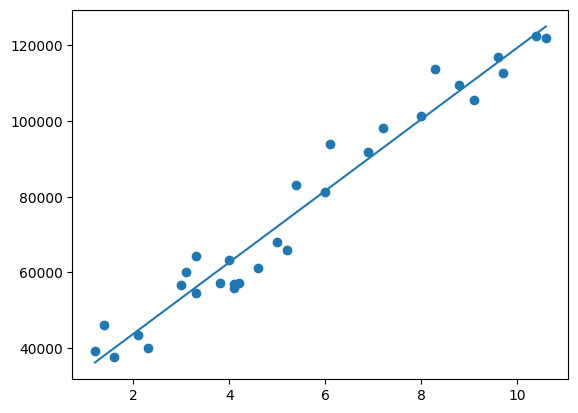

In [10]:
# Use the linear regression to show the relationship between two variables.
slope, intercept, r, p, std_err = stats.linregress(years_work, salary)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, years_work))

plt.scatter(years_work, salary)
plt.plot(years_work, mymodel)
plt.show()

#### So, in our example we have high R-squared value = 0.957, which is very close to the maximum 1. Hence, our linear regression model fits the points very well.

- Let's see another example, but with low R-squared value.

In [11]:
# Opening and reading the file.
med_insur = pd.read_csv('C:\\Users\\User\\Desktop\\medical_insurance.csv')

# Print first 10 rows.
med_insur.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


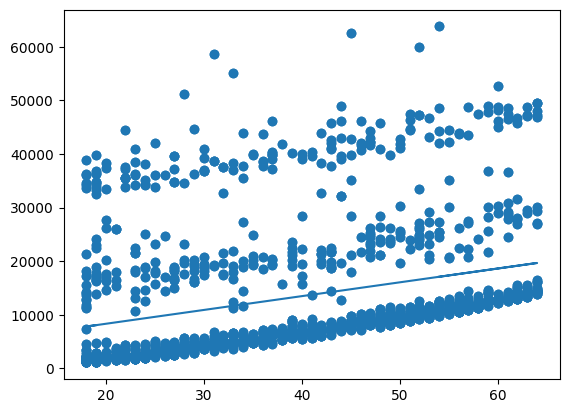

In [12]:
# Creating variables for rows.
age = med_insur['age']
charges = med_insur['charges']

#  Use the linregress() function of stats library.
slope, intercept, r, p, std_err = stats.linregress(age, charges)

def myfunc(x):
    return slope * x + intercept

model_age_charges = list(map(myfunc, age))

# Plot the original scatter.
plt.scatter(age, charges)
# Plot the linear regression model.
plt.plot(age, model_age_charges)
plt.show()

In [13]:
# Let's see the R-squared in regression table of this example.
model_table_age_charges = smf.ols('charges ~ age', data= med_insur)

# Obtain the information about regression model by calling fit()
results = model_table_age_charges.fit()

# Call summary() to get the table with results of linear regression.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     271.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.32e-58
Time:                        19:52:35   Log-Likelihood:                -29875.
No. Observations:                2772   AIC:                         5.975e+04
Df Residuals:                    2770   BIC:                         5.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3182.7705    650.450      4.893      0.0

As we see the R-squared value in this relationship has a very low value from 0 to 1 = 0.089. It means that our linear regression model in this case fits the necessary points not well. 

In [14]:
# One interesting way of finding the R-squared value:
slope, intercept, r, p, std_err = stats.linregress(age, charges)

print(r ** 2)

0.08917609367391752
